# Machine Learning: Supervised Learning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Ridge-Regression-(L2-penalty)" data-toc-modified-id="Ridge-Regression-(L2-penalty)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ridge Regression (L2 penalty)</a></span></li><li><span><a href="#Lasso-(L1-penalty)" data-toc-modified-id="Lasso-(L1-penalty)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Lasso (L1 penalty)</a></span></li><li><span><a href="#Ejercicios" data-toc-modified-id="Ejercicios-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ejercicios</a></span><ul class="toc-item"><li><span><a href="#Ejercicio-1" data-toc-modified-id="Ejercicio-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Ejercicio 1</a></span></li><li><span><a href="#Ejercicio-2" data-toc-modified-id="Ejercicio-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Ejercicio 2</a></span></li></ul></li></ul></div>

# Regresión: Regularización - Ridge y Lasso

En este notebook vamos a estudiar como la regularización puede ayudarnos a reducir los efectos del bias y la varianza. En concreto veremos como utilizar regularización en modelos de regresión.


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Linear Regression


Todos los modelos de regresión lineal aprenden una serie de *coeficientes* (también llamados parámetros o pesos) y un *intercept* (también llamado bias) para realizar una combinación lineal de las características del modelo a aprender. Así tenemos que:

```
y_pred = x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept_
```

Existen varios modelos de regresión lineal cuya principal diferencia reside en las restricciones que le ponemos en los *coeficientes*. Recordad que estas restricciones se conocen como regularización.

Vamos a generar una conjunto de datos sintético que nos permita ver el comportamiento de estos modelos.

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y, coefs = make_regression(n_samples=200, n_features=30, n_informative=10,
                              noise=100, coef=True, random_state=5)
print(X.shape)
print(y.shape)
# print(coefs)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=5,
                                                    train_size=60)
print(X_train.shape, X_test.shape)


El modelo lineal más famoso es la regresión OLS (Ordinary Least Squares), llamada *regresión lineal*. Este tipo de regresión no impone ninguna restricción a los coeficientes. Esto significa que cuando tenemos un gran número de caracterísiticas, el modelo tienda a sobreajustar.

$$ \text{min}_{w, b} \sum_i || w^\mathsf{T}x_i + b  - y_i||^2 $$

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)

In [ ]:
regr.score(X_train, y_train)

In [ ]:
regr.score(X_test, y_test)

Como vemos el $R^2$ en el conjunto de entrenamiento es muy alto, pero muy bajo en el conjunto de test. Esto suele ser un indicativo de que nuestro modelo está sobreajustando.

Vamos a aprovecharnos que nuestros datos son sinténticos para evaluar como se comporta el modelo real sobre los datos:

In [ ]:
np.dot?

In [ ]:
from sklearn.metrics import r2_score
r2_score(np.dot(X, coefs), y)

Por lo que podemos decir que un $R^2 \approx 0.6$ es un resultado ideal para nuestro conjunto de datos. 

También vamos a aprovechar que tenemos conjuntos de datos sinténticos para comparar los coeficientes del aprendidos por el modelo con los coeficientes reales de nuestros datos sinténticos:

In [ ]:
coefs_sorted = np.argsort(coefs)[::-1]
coefs[coefs_sorted]

In [ ]:
plt.plot(coefs[coefs_sorted], "o", label="Coefs verdaderos")
plt.plot(regr.coef_[coefs_sorted], "o", label="Coefs estimados")
plt.xlabel("Coefs")
plt.ylabel("Valor Coef")
plt.legend()

plt.show()

Un método muy útil para conocer si nuestro modelo sufre de *underfitting* o de *overfitting* es calcular las curvas de aprendizaje. Éstas muestran el score del modelo en los conjuntos de training y de test para un número determinado de muestras de entrenamiento.

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
def plot_learning_curve(est, X, y):
    
    train_size, train_score, test_score = learning_curve(est, X, y,
                                                         train_sizes=np.linspace(0.1, 1, 20))
    plt.plot(train_size, train_score.mean(axis=1), "-", label="Train")
    plt.plot(train_size, test_score.mean(axis=1), "-", label="Test")
    plt.ylim(-0.1, 1.1)
    plt.legend()

    plt.show()

In [ ]:
plot_learning_curve(LinearRegression(),X, y)

## Ridge Regression (L2 penalty)

La **Regresión de Ridge** es un método de regularización que impone una restricción a los pesos del modelo de regresión simple. La regresión que impone la Regresión de Ridge se basa en la norma $L2$. Este tipo de regularización tiene la ventaja de no ser mucho más pesada computacionalmente que una regresión por OLS.

$$ \text{min}_{w,b}  \sum_i || w^\mathsf{T}x_i + b  - y_i||^2  + \alpha ||w||_2^2$$ 

Como vemos, la Regresión de Ridge, es muy parecida a la Regresión Lineal. La única diferencia entre ambas es que Ridge añade la norma L2 a la función de minimización.

El parámetro libre $\alpha$ regula la cantidad de regularización que queemos aplicar al modelo. Vamos a probar varios valores de $\alpha$ para evaluar como afecta al performance del modelo:

In [ ]:
from sklearn.linear_model import Ridge

regr = Ridge(alpha=1)
regr.fit(X_train, y_train)

print(regr.score(X_train, y_train), regr.score(X_test, y_test))

In [ ]:
train_r2 = []
test_r2 = []
alphas = [0.001, 0.01, 0.1, 1, 5, 10, 30, 100]
ridge_models = {}

for alpha in alphas:
    regr = Ridge(alpha=alpha)
    regr.fit(X_train, y_train)
    train_r2.append(regr.score(X_train, y_train))
    test_r2.append(regr.score(X_test, y_test))
    ridge_models[alpha] = regr
    
plt.plot(train_r2, label="R2 Train")
plt.plot(test_r2, label="R2 Test")
plt.xticks(range(len(alphas)), alphas)
plt.legend()

plt.show()

Tenemos el máximo score en el conjunto de test para $\alpha = 10$.


**EJERCICIO**:

- Qué le ocurre al modelo para valores de $\alpha$ menores a 10?
- Qué le ocurre al modelo par avalores de $\alpha$ mayores a 10?

Vamos a ver lo ocurre con los coeficientes:

In [ ]:
plt.plot(coefs[coefs_sorted], "s", label="Coefs Verdaderos")

for alpha in [100, 10]:
    plt.plot(ridge_models[alpha].coef_[coefs_sorted], "o",
             label="alpha = " + str(alpha))
plt.legend()
plt.show()

- Valores altos de $\alpha$ producen que el modelo tienda a ajustar los pesos a 0.
  - Es decir, aumentan el bias del modelo.
- Valores bajos de $\alpha$ producen que el modelo se comporte como una regresión lineal sin regularización.

En **resumen**: es muy importante elegir el valor óptimo de $\alpha$. 

Ahora vamos a ver las curvas de aprendizaje del modelo de Ridge vs la Regresión Lineal.

In [ ]:
plt.style.use("ggplot")

In [ ]:
plt.subplot(211)
plot_learning_curve(LinearRegression(), X, y)
plt.subplot(212)
plot_learning_curve(Ridge(alpha=10), X, y)

plt.show()

## Lasso (L1 penalty)

La **Regresión de Lasso** es otro tipo de regularización pero que impone una restrucción utilizando la norma $L1$. Este tipo de regularización es útil cuando creemos que muchas de los parámetros del modelo no son relevantes (como es el caso de nuestro dataset). 

$$ \text{min}_{w, b} \sum_i || w^\mathsf{T}x_i + b  - y_i||^2  + \alpha ||w||_1$$ 

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
train_r2_lasso = []
test_r2_lasso = []
alphas = [0.001, 0.01, 0.1, 1, 5, 10, 30, 100]
lasso_models = {}

for alpha in alphas:
    regr = Lasso(alpha=alpha)
    regr.fit(X_train, y_train)
    train_r2_lasso.append(regr.score(X_train, y_train))
    test_r2_lasso.append(regr.score(X_test, y_test))
    lasso_models[alpha] = regr


In [ ]:
plt.subplot(211)
plt.title("Lasso")
plt.plot(train_r2_lasso, label="R2 Train")
plt.plot(test_r2_lasso, label="R2 Test")
plt.ylim(0, 1)
plt.xticks(range(len(alphas)), alphas)
plt.legend()

plt.subplot(212)
plt.title("Ridge")
plt.plot(train_r2, label="R2 Train")
plt.plot(test_r2, label="R2 Test")
plt.ylim(0, 1)
plt.xticks(range(len(alphas)), alphas)
plt.legend()

plt.show()

In [ ]:
plt.plot(coefs[coefs_sorted], "s", label="Coefs Verdaderos")

for alpha in [30, 10]:
    plt.plot(lasso_models[alpha].coef_[coefs_sorted], "o-",
             label="alpha = " + str(alpha))
plt.legend()
plt.show()

In [ ]:
plt.subplot(311)
plt.title("Reg Lineal")
plot_learning_curve(LinearRegression(), X, y)
plt.subplot(312)
plt.title("Ridge")
plot_learning_curve(Ridge(alpha=10), X, y)
plt.subplot(313)
plt.title("Lasso")
plot_learning_curve(Lasso(alpha=10), X, y)

plt.show()

### Ejercicio 1

Ajusta los algoritmos de regresión de Ridge y Lasso al dataset `YearPredictionMSD.txt` seleccionando los $\alpha$ óptimos para cada uno de ellos. Compara los resultados con los obtenidos con **regresión lineal clásica**.

0. Seleccionar una muestra aleatoria de 10000 observaciones del dataset original (`DataFrame.sample?`).
1. Determinar el mejor $\alpha$ para Ridge y Lasso.
2. Representar los coeficientes de los modelos de regresión lineal, Ridge y Lasso.
3. Representar las curvas de aprendizaje para los tres modelos.

Cargamos el dataset

In [1]:
!pwd

/home/bigdatafutura/Sesion 03


In [83]:
PATH = "/home/bigdatafutura/Sesion 03/files/YearPredictionMSD.txt"

columns = ["target"] + ["timbre_avg_" + str(i) for i in range(1, 13)]
columns = columns + ["timbre_cov_" + str(i) for i in range(1, 79)]
len(columns)

df = pd.read_csv(PATH, names=columns, header=None)
df.head(3)

,target,timbre_avg_1,timbre_avg_2,timbre_avg_3,timbre_avg_4,timbre_avg_5,timbre_avg_6,timbre_avg_7,timbre_avg_8,timbre_avg_9,...,timbre_cov_69,timbre_cov_70,timbre_cov_71,timbre_cov_72,timbre_cov_73,timbre_cov_74,timbre_cov_75,timbre_cov_76,timbre_cov_77,timbre_cov_78
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345


Muestreamos y hacemos split

In [84]:
df = df.sample(n=10000, random_state=5)
df.shape

(10000, 91)

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]], df["target"],
                                                    train_size=0.8, random_state=5)

/bk/bigdata/working_dir/bancadigital/se07080/bk/anaconda/envs/p_se07080/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Ajustamos Ridge

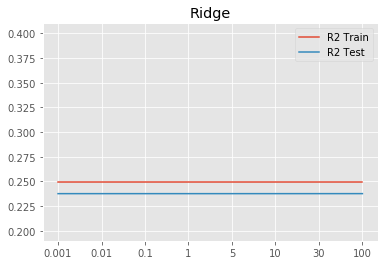

In [86]:
from sklearn.linear_model import Ridge

train_r2 = []
test_r2 = []
alphas = [0.001, 0.01, 0.1, 1, 5, 10, 30, 100]
ridge_models = {}

for alpha in alphas:
    regr = Ridge(alpha=alpha)
    regr.fit(X_train, y_train)
    train_r2.append(regr.score(X_train, y_train))
    test_r2.append(regr.score(X_test, y_test))
    ridge_models[alpha] = regr

plt.title("Ridge")
plt.plot(train_r2, label="R2 Train")
plt.plot(test_r2, label="R2 Test")
plt.ylim(0.19, 0.41)
plt.xticks(range(len(alphas)), alphas)
plt.legend()

plt.show()

In [89]:
test_r2

[0.23770653597275537,
 0.23770653821162713,
 0.23770656060020667,
 0.23770678447188742,
 0.23770777914655283,
 0.23770902177698916,
 0.23771398438332547,
 0.23773125400396444]

In [87]:
alphas[np.argmax(test_r2)]

100

Ajustamos Lasso

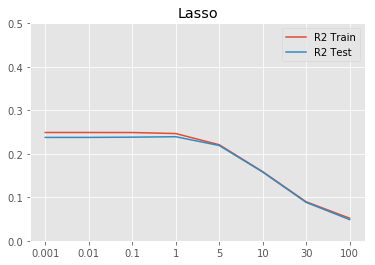

In [90]:
from sklearn.linear_model import Lasso

train_r2_lasso = []
test_r2_lasso = []
alphas = [0.001, 0.01, 0.1, 1, 5, 10, 30, 100]
lasso_models = {}

for alpha in alphas:
    regr = Lasso(alpha=alpha)
    regr.fit(X_train, y_train)
    train_r2_lasso.append(regr.score(X_train, y_train))
    test_r2_lasso.append(regr.score(X_test, y_test))
    ridge_models[alpha] = regr

plt.title("Lasso")
plt.plot(train_r2_lasso, label="R2 Train")
plt.plot(test_r2_lasso, label="R2 Test")
plt.ylim(0, 0.5)
plt.xticks(range(len(alphas)), alphas)
plt.legend()

plt.show()

In [92]:
test_r2_lasso

[0.23771299147562397,
 0.23777046353830059,
 0.2382815938266326,
 0.23930599554771592,
 0.21913789540847006,
 0.1581043221335363,
 0.08833950789474788,
 0.04871802655021562]

In [91]:
alphas[np.argmax(test_r2_lasso)]

1

Graficamos las Learning Curves

In [93]:
def plot_learning_curve(est, X, y):
    
    train_size, train_score, test_score = learning_curve(est, X, y,
                                                         train_sizes=np.linspace(0.1, 1, 20))
    max_r2 = np.max(test_score.mean(axis=1))
    plt.plot(train_size, train_score.mean(axis=1), "-", label="Train")
    plt.plot(train_size, test_score.mean(axis=1), "-", label="Test")
    plt.plot([np.min(train_size),np.max(train_size)],
             [max_r2, max_r2], "--", label="Max R2",c="black")
    plt.ylim(-0.1, 1.1)
    plt.legend()

    plt.show()

In [94]:
from sklearn.linear_model import LinearRegression

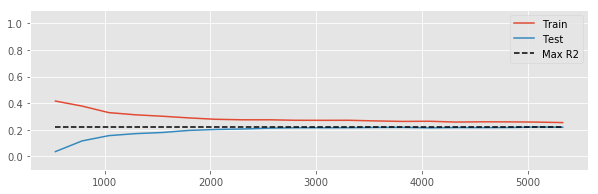

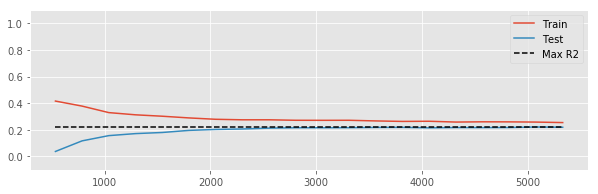

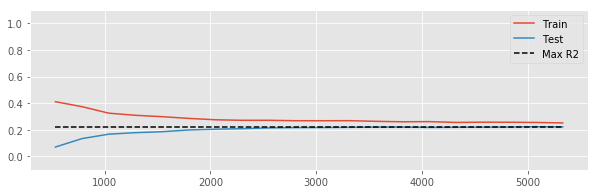

In [95]:
plt.figure(figsize=(10,10))
plt.subplot(311)
plot_learning_curve(LinearRegression(), X_train, y_train)
plt.figure(figsize=(10,10))
plt.subplot(312)
plot_learning_curve(Ridge(alpha=alphas[np.argmax(test_r2)]), X_train, y_train)
plt.figure(figsize=(10,10))
plt.subplot(313)
plot_learning_curve(Lasso(alpha=alphas[np.argmax(test_r2_lasso)]), X_train, y_train)

Graficamos los coeficientes

In [96]:
linear = LinearRegression()
linear.fit(X_train, y_train)

ridge = Ridge(alpha=alphas[np.argmax(test_r2)])
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=alphas[np.argmax(test_r2_lasso)])
lasso.fit(X_train, y_train)


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

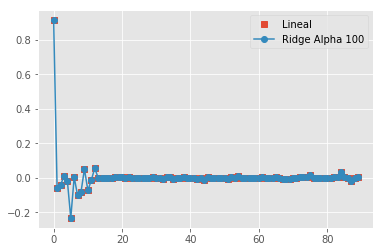

In [97]:
plt.plot(linear.coef_, "s", label="Lineal")
plt.plot(ridge.coef_, "o-", label="Ridge Alpha " + str(alphas[np.argmax(test_r2)]))

plt.legend()
plt.show()

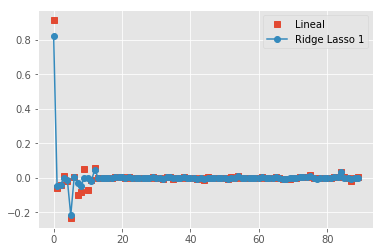

In [98]:
plt.plot(linear.coef_, "s", label="Lineal")
plt.plot(lasso.coef_, "o-", label="Ridge Lasso " + str(alphas[np.argmax(test_r2_lasso)]))

plt.legend()
plt.show()